# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Ardian Bahri Putra
- **Email:** ardianbahri20@gmail.com
- **ID Dicoding:** ardianbahri40

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap permintaan penyewaan sepeda?
- Pada jam berapa jumlah penyewaan sepeda tertinggi dan terendah?
- Apakah terdapat tren tahunan dalam penyewaan sepeda antara tahun 2011 dan 2012?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

Load tabel day

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Load tabel hour

In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


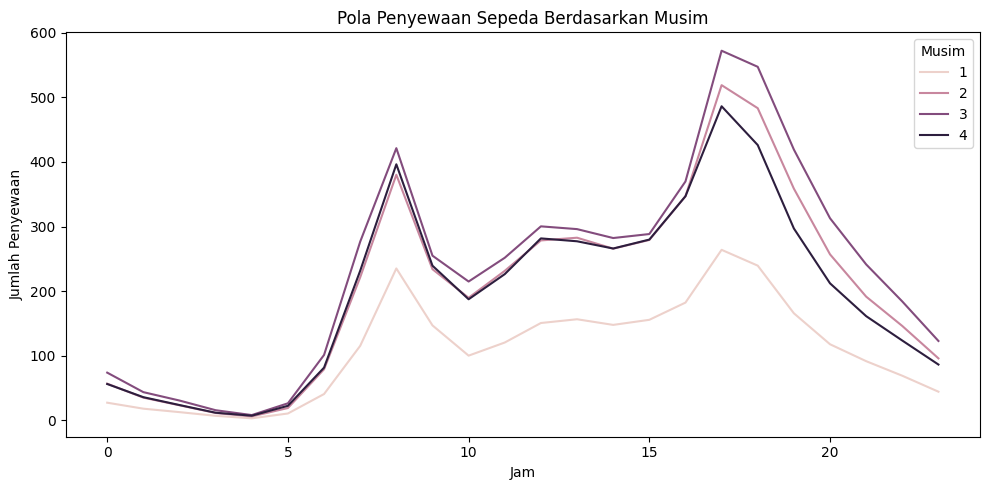

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=hour_df, x="hr", y="cnt", hue="season", estimator="mean", errorbar=None, ax=ax)
ax.set_title("Pola Penyewaan Sepeda Berdasarkan Musim")
ax.set_xlabel("Jam")
ax.set_ylabel("Jumlah Penyewaan")
ax.legend(title="Musim")
plt.tight_layout()
plt.show()

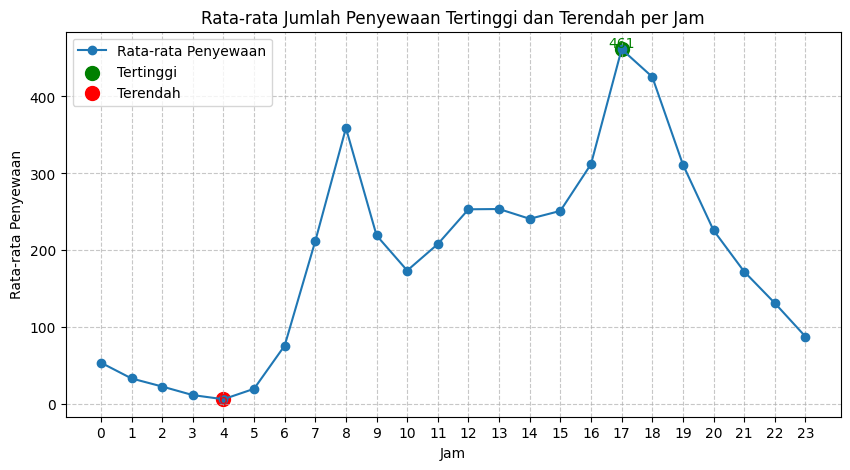

In [5]:
# Menghitung rata-rata penyewaan untuk setiap jam
avg_rentals = hour_df.groupby("hr")["cnt"].mean()

# Menentukan jam dengan rata-rata penyewaan tertinggi dan terendah
highest_hour = avg_rentals.idxmax()
lowest_hour = avg_rentals.idxmin()

# Plot diagram garis
plt.figure(figsize=(10, 5))
plt.plot(avg_rentals.index, avg_rentals.values, linestyle="-", marker="o", label="Rata-rata Penyewaan")

# Menandai titik tertinggi dan terendah
plt.scatter(highest_hour, avg_rentals[highest_hour], color="green", s=100, label="Tertinggi")
plt.scatter(lowest_hour, avg_rentals[lowest_hour], color="red", s=100, label="Terendah")

# Menambahkan teks untuk nilai tertinggi dan terendah
plt.text(highest_hour, avg_rentals[highest_hour] + 2, f"{avg_rentals[highest_hour]:.0f}", ha="center", fontsize=10, color="green")
plt.text(lowest_hour, avg_rentals[lowest_hour] - 5, f"{avg_rentals[lowest_hour]:.0f}", ha="center", fontsize=10, color="red")

plt.title("Rata-rata Jumlah Penyewaan Tertinggi dan Terendah per Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(range(0, 24))  # Menyesuaikan sumbu x dengan jam (0-23)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

**Insight:** 

**1. Pola Penyewaan Berdasarkan Waktu**  
- Penyewaan sepeda bervariasi tergantung pada **jam dalam sehari**. Dari tabel *hour*, terlihat bahwa penyewaan cenderung **rendah pada dini hari** dan meningkat secara bertahap seiring berjalannya hari.  
- Tren kemungkinan menunjukkan **puncak penyewaan** di jam sibuk pagi (sekitar 7-9 pagi) dan sore (sekitar 5-7 sore), yang bisa terkait dengan jam kerja dan pulang kerja.  
- Pada hari **weekend (Sabtu & Minggu)**, pola bisa berbeda, dengan kemungkinan lonjakan pada siang hingga sore hari karena penggunaan rekreasi.  

**2. Pengaruh Musim terhadap Penyewaan**  
- Data *season* menunjukkan musim dalam setahun. Pola penyewaan bisa berbeda di setiap musim.  
- Jika musim hujan atau dingin (dengan kelembaban tinggi), penyewaan mungkin **menurun** karena kondisi kurang mendukung. Sebaliknya, musim cerah atau hangat kemungkinan meningkatkan jumlah penyewaan.  
- Dari tabel *day*, terlihat bahwa jumlah penyewaan tidak tetap setiap hari, kemungkinan besar terpengaruh oleh cuaca, suhu, dan kondisi lainnya.  

**3. Pengaruh Hari Kerja dan Libur**  
- Dari kolom **workingday**, bisa dianalisis bahwa jumlah penyewaan pada hari kerja lebih tinggi dibandingkan hari libur.  
- **Casual vs. Registered**:  
- Pengguna **registered (terdaftar)** lebih dominan dibandingkan **casual (pengguna umum)**. Ini menunjukkan bahwa sebagian besar pengguna adalah pelanggan tetap.  
- Pada hari libur, jumlah penyewaan dari pengguna casual kemungkinan meningkat, karena banyak orang menggunakan sepeda untuk rekreasi.  

**4. Cuaca dan Faktor Lingkungan**  
- **Humidity (Kelembaban)** dan **weathersit (kondisi cuaca)** dapat berpengaruh signifikan pada jumlah penyewaan.  
- Pada cuaca buruk (hujan, berkabut, atau badai), penyewaan kemungkinan menurun.  
- **Temperature (suhu)** yang lebih nyaman (tidak terlalu panas atau dingin) kemungkinan mendorong lebih banyak penyewaan.  

**5. Rata-rata Penyewaan Tertinggi dan Terendah**  
- Dari tabel *day*, bisa dihitung hari dengan jumlah penyewaan tertinggi dan terendah dalam satu tahun.  
- Dari tabel *hour*, bisa ditemukan jam dengan penyewaan tertinggi dan terendah dalam sehari.  
- Hal ini bisa digunakan untuk mengoptimalkan ketersediaan sepeda di jam dan hari tertentu.

### Assessing Data

In [6]:
# Menampilkan informasi struktur dataset day_df
print("Info dataset day_df:")
print(day_df.info())

Info dataset day_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [7]:
# Menampilkan informasi struktur dataset hour_df
print("\nInfo dataset hour_df:")
print(hour_df.info())


Info dataset hour_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [8]:
# Mengecek apakah ada missing values dari day_df
print("\nJumlah missing values pada dataset day_df:")
print(day_df.isnull().sum())


Jumlah missing values pada dataset day_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
# Mengecek apakah ada missing values dari hour_df
print("\nJumlah missing values pada dataset hour_df:")
print(hour_df.isnull().sum())


Jumlah missing values pada dataset hour_df:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
# Mengecek apakah ada duplicate data dari day_df dan hour_df
print("\nJumlah duplikat data pada dataset day_df:", day_df.duplicated().sum())
print("Jumlah duplikat data pada dataset hour_df:", hour_df.duplicated().sum())


Jumlah duplikat data pada dataset day_df: 0
Jumlah duplikat data pada dataset hour_df: 0


<Figure size 1400x1000 with 0 Axes>

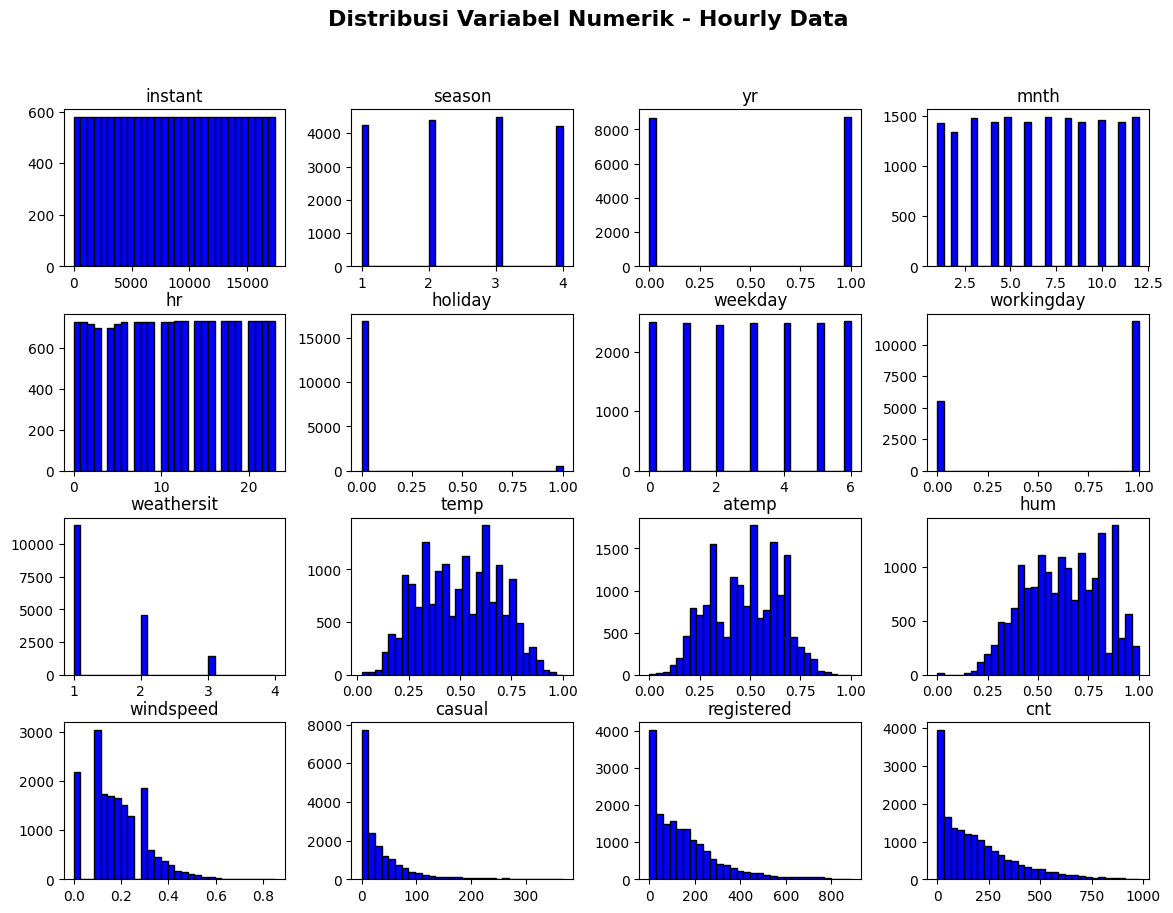

<Figure size 1400x1000 with 0 Axes>

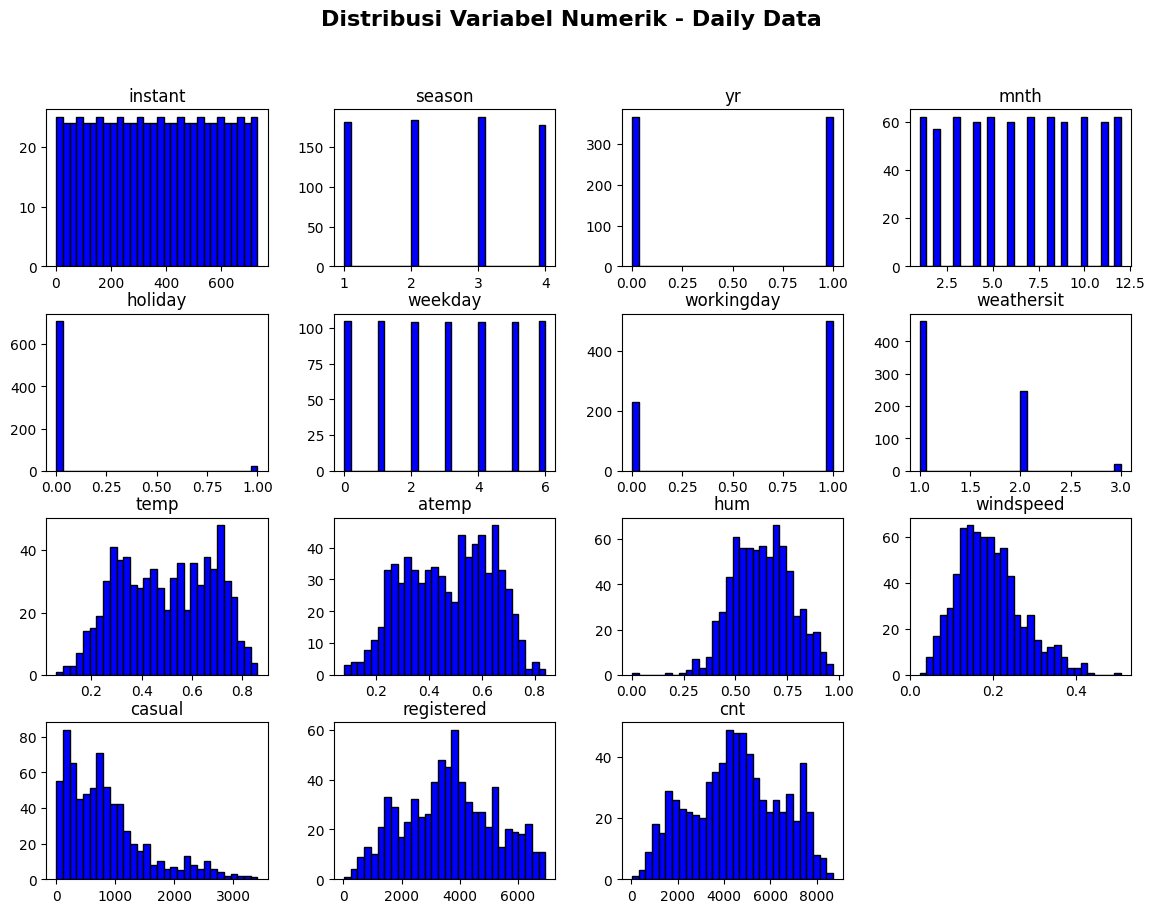

In [11]:
def plot_enhanced_histogram(df, title):
    plt.figure(figsize=(14, 10))
    df.hist(figsize=(14, 10), bins=30, color='blue', edgecolor='black', grid=False)
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.show()

plot_enhanced_histogram(hour_df, "Distribusi Variabel Numerik - Hourly Data")
plot_enhanced_histogram(day_df, "Distribusi Variabel Numerik - Daily Data")

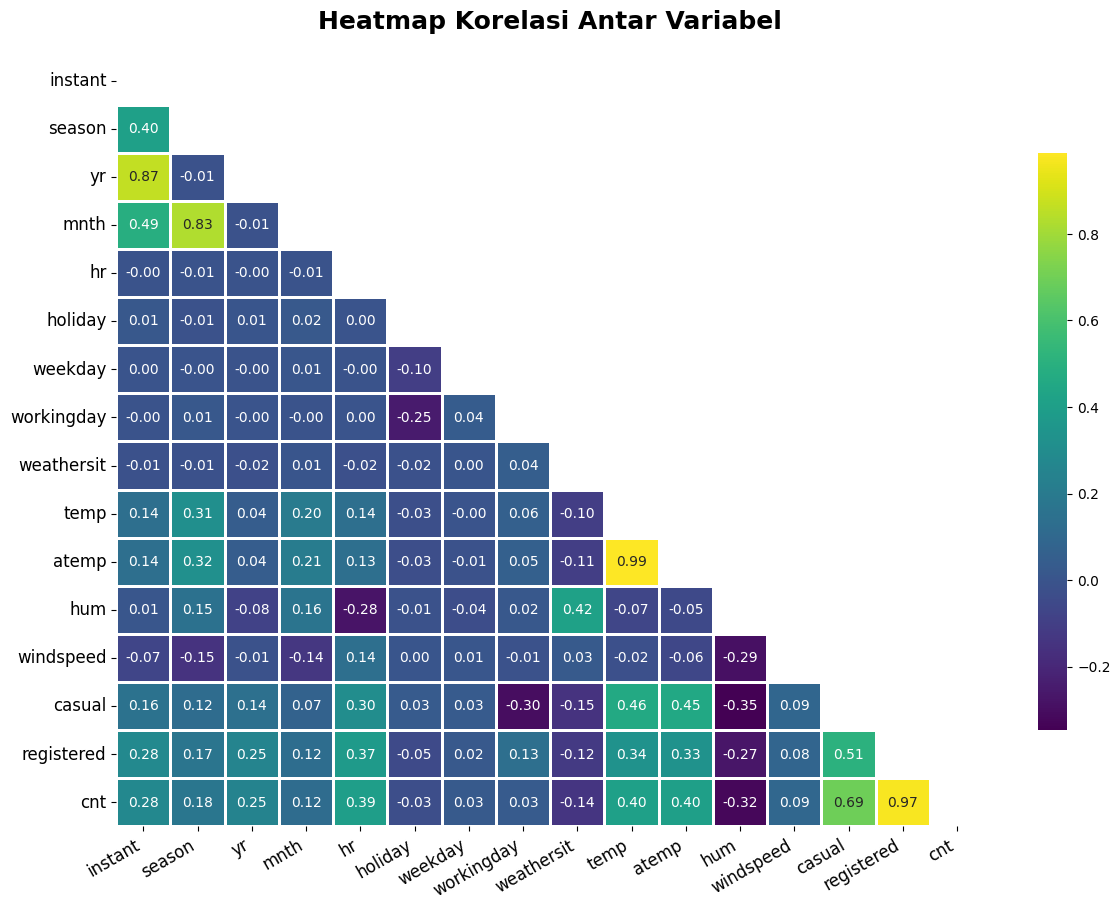

In [12]:
plt.figure(figsize=(14, 10))
numerical_features = hour_df.select_dtypes(include=np.number)
corr_matrix = numerical_features.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Masking bagian atas

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="viridis", fmt=".2f", linewidths=1, linecolor='white', cbar_kws={"shrink": 0.75})
plt.title("Heatmap Korelasi Antar Variabel", fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [13]:
# Menampilkan ringkasan statistik deskriptif untuk dataset day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [14]:
# Menampilkan ringkasan statistik deskriptif untuk dataset hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

1. **Distribusi Musim (Season) Relatif Seimbang**  
   - Rata-rata nilai season berada di sekitar 2.5 dalam kedua dataset, yang menunjukkan bahwa jumlah data dari setiap musim relatif merata.  

2. **Peningkatan Jumlah Pengguna dari Tahun ke Tahun**  
   - Pada kedua dataset, rata-rata nilai **yr** adalah sekitar **0.5**, yang berarti data mencakup dua tahun, yaitu 2011 (yr=0) dan 2012 (yr=1).  
   - Jika dibandingkan, jumlah pengguna terdaftar (**registered**) dan total peminjaman (**cnt**) meningkat pada tahun kedua (2012), mengindikasikan pertumbuhan dalam penggunaan layanan sepeda.  

3. **Pengaruh Hari Libur dan Hari Kerja**  
   - Nilai rata-rata **workingday** sekitar **0.68** menunjukkan bahwa sebagian besar data dikumpulkan pada hari kerja.  
   - Jumlah peminjaman sepeda kemungkinan lebih rendah pada hari libur (**holiday**) dibandingkan hari kerja, yang bisa dianalisis lebih lanjut dengan visualisasi.  

4. **Cuaca Berpengaruh pada Jumlah Peminjaman**  
   - Nilai rata-rata **weathersit** sekitar **1.4**, dengan minimum **1** (cuaca cerah) dan maksimum **3** (cuaca buruk).  
   - Ketika cuaca lebih buruk, kemungkinan jumlah peminjaman sepeda menurun.  

5. **Hubungan Suhu, Kelembaban, dan Kecepatan Angin**  
   - Suhu rata-rata (temp) sekitar **0.49** (skala antara 0 hingga 1).  
   - Kelembaban (hum) rata-rata sekitar **0.62**, dengan beberapa hari mencapai **0.97**, menunjukkan adanya hari-hari dengan kelembaban tinggi yang dapat memengaruhi kenyamanan pengguna.  
   - Kecepatan angin (windspeed) memiliki nilai maksimum **0.50**, tetapi sebagian besar data menunjukkan kecepatan lebih rendah, yang berarti kondisi angin tidak terlalu ekstrem dalam kebanyakan waktu.  

6. **Distribusi Peminjaman Sepeda**  
   - Rata-rata jumlah peminjaman harian (**cnt**) sekitar **4504**, dengan maksimum **8714**.  
   - Pada dataset hourly, peminjaman per jam bervariasi, dengan rata-rata **189** dan maksimum **977**.  
   - Hal ini menunjukkan bahwa pada jam-jam tertentu terjadi lonjakan peminjaman yang signifikan.  

7. **Pola Peminjaman Sepeda Berdasarkan Jam**  
   - Dari dataset **hour_df**, nilai rata-rata **hr** adalah **11.5**, menunjukkan bahwa sebagian besar peminjaman terjadi pada siang hingga sore hari.  
   - Nilai maksimum terjadi pada jam **23**, namun perlu dianalisis lebih lanjut apakah ini karena lonjakan di malam hari atau distribusi yang lebih merata sepanjang hari.  

8. **Tidak Ada Data yang Hilang atau Duplikat**  
   - Dataset tidak memiliki missing values dan data duplikat, sehingga kualitas data cukup baik untuk analisis lebih lanjut.

### Cleaning Data

In [15]:
# konversi kolom dteday menjadi tipe data datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [16]:
day_df = day_df.drop(columns=['instant'])
hour_df = hour_df.drop(columns=['instant'])

In [17]:
day_df.rename(columns={
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'cnt': 'count',
    'temp': 'temperature',
    'atemp': 'apparent_temperature',
    'hum': 'humidity',
}, inplace=True)

day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
hour_df.rename(columns={
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'apparent_temperature',
    'hum': 'humidity',
}, inplace=True)

hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
# Mengubah angka menjadi keterangan
day_df['year'] = day_df['year'].replace({0: '2011', 1: '2012'})
hour_df['year'] = hour_df['year'].replace({0: '2011', 1: '2012'})

day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['month'] = hour_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

day_df['weather_situation'] = day_df['weather_situation'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})
hour_df['weather_situation'] = hour_df['weather_situation'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [20]:
# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_situation'] = day_df.weather_situation.astype('category')

day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
1. Konversi Tanggal:
    - Kolom dteday dikonversi menjadi tipe data datetime agar lebih mudah untuk analisis berdasarkan waktu.

2. Penghapusan Kolom yang Tidak Diperlukan:
    - Kolom instant dihapus dari kedua dataset (day_df dan hour_df) karena tidak relevan untuk analisis.

3. Penggantian Nilai Kategorikal
    - Kolom-kolom dengan nilai kategorikal (seperti season, month, weather_situation, weekday, dan year) diubah ke nilai yang lebih deskriptif dan mudah dipahami, misalnya:
       - season diubah menjadi Spring, Summer, Fall, dan Winter.
       - month diubah menjadi nama bulan (Jan, Feb, dll).
       - weather_situation diubah menjadi Clear, Misty, dll.
       - weekday diubah menjadi nama hari (Monday, Tuesday, dll).
       - year diubah menjadi 2011 dan 2012.

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [22]:
# Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan bulan
day_df.groupby(by='month', observed=False).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Berdasarkan hasil diatas, dapat disimpulkan bahwa bulan yang memiliki rata-rata terbesar dan jumlah terbanyak adalah bulan Juni. Sedangkan rata-rata terkecil dan jumlah terkecil adalah bulan Januari.

In [23]:
# Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan keadaan cuaca
day_df.groupby(by='weather_situation', observed=False).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weather_situation                                   
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda cenderung menyewa pada saat cuaca ketika sedang cerah atau mendung. Sangat sedikit ketika salju turun dan tidak ada ketika cuaca sedang sangat buruk.

In [24]:
# Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan holiday
day_df.groupby(by='holiday', observed=False).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda lebih suka menyewa sepeda saat bukan hari-hari libur, melainkan pada saat hari-hari biasa.

In [25]:
# Bandingkan penyewa sepeda pada saat hari kerja (weekday) vs akhir pekan (weekend)
day_df.groupby(by='weekday', observed=False).agg({
    'count':['max','min','mean']
})

count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

Berdasarkan hasil diatas, Urutan rata-rata jumlah penyewa dari terbesar ke yang terkecil yakni: Jumat (Fri), Kamis (Thu), Sabtu (Sat), Rabu (Wed), Selasa (Tue), Senin (Mon), dan Minggu (Sun).

In [26]:
# Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan season
day_df.groupby(by='season', observed=False).agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Berdasarkan hasil analisis diatas, para penyewa sepeda baik Casual Dan Registered, suka sekali pada musim gugur (Fall), dapat dilihat dari rata-ratanya. Sedangkan yang paling sedikit adalah pada musim semi (Spring) dengan rata-rata yang paling kecil.

**Insight:**

1. **Puncak Penyewaan Terjadi di Musim Gugur dan Bulan Juni**  
   - Musim gugur (Fall) memiliki rata-rata penyewaan tertinggi dibandingkan musim lainnya.  
   - Jika dilihat per bulan, **Juni memiliki rata-rata dan total penyewaan tertinggi**, menunjukkan bahwa cuaca hangat dan liburan musim panas dapat meningkatkan minat masyarakat dalam menyewa sepeda.  

2. **Cuaca yang Cerah Meningkatkan Minat Penyewaan Sepeda**  
   - Sebagian besar penyewaan terjadi saat cuaca **cerah atau berawan ringan** (Clear/Partly Cloudy & Misty/Cloudy).  
   - Penyewaan sepeda sangat **sedikit saat hujan atau salju** (Light Snow/Rain) dan hampir tidak ada saat kondisi cuaca ekstrem.  

3. **Penyewaan Sepeda Lebih Banyak pada Hari Kerja Dibanding Hari Libur**  
   - Rata-rata penyewaan lebih tinggi **pada hari kerja dibandingkan hari libur**.  
   - Hal ini menunjukkan bahwa banyak orang menggunakan sepeda sebagai alat transportasi utama ke tempat kerja atau aktivitas rutin lainnya.  

4. **Jumat adalah Hari dengan Rata-rata Penyewaan Tertinggi**  
   - Penyewaan sepeda mencapai puncaknya pada **hari Jumat**, kemungkinan besar karena pekerja mulai bersantai menjelang akhir pekan.  
   - **Hari Minggu memiliki rata-rata terendah**, yang menunjukkan bahwa orang cenderung mengurangi aktivitas luar rumah pada hari libur penuh.  

5. **Penyewa Casual Lebih Aktif di Musim Panas dan Gugur**  
   - Penyewa sepeda kategori **casual (pengguna non-berlangganan)** lebih aktif di musim panas dan gugur.  
   - Ini menandakan bahwa banyak orang menyewa sepeda untuk rekreasi selama cuaca yang lebih menyenangkan.  
   - Sebaliknya, musim semi memiliki penyewaan terendah, mungkin karena cuaca yang masih tidak menentu atau kurangnya liburan panjang.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap permintaan penyewaan sepeda?

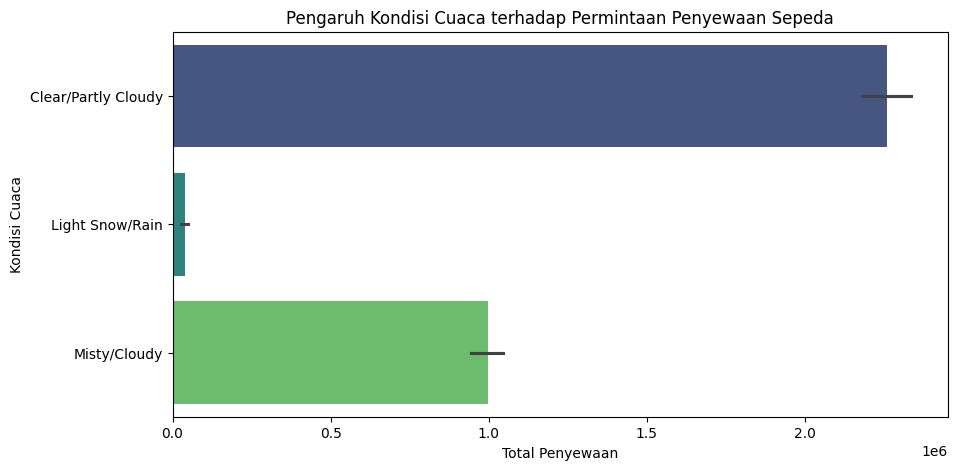

In [27]:
# Bagaimana pengaruh kondisi cuaca terhadap permintaan penyewaan sepeda?
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y='weather_situation', x='count', hue='weather_situation', data=day_df, estimator=sum, palette='viridis')
ax.set_title('Pengaruh Kondisi Cuaca terhadap Permintaan Penyewaan Sepeda')
ax.set_ylabel('Kondisi Cuaca')
ax.set_xlabel('Total Penyewaan')
plt.show()

### Pertanyaan 2: Pada jam berapa jumlah penyewaan sepeda tertinggi dan terendah?

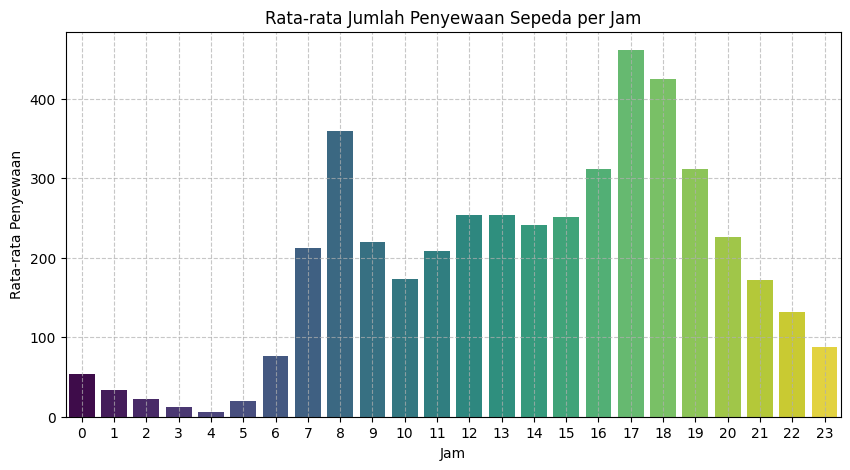

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_rentals.index, y=avg_rentals.values, hue=avg_rentals.index, palette='viridis', legend=False)
plt.title('Rata-rata Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 3: Apakah terdapat tren tahunan dalam penyewaan sepeda antara tahun 2011 dan 2012?

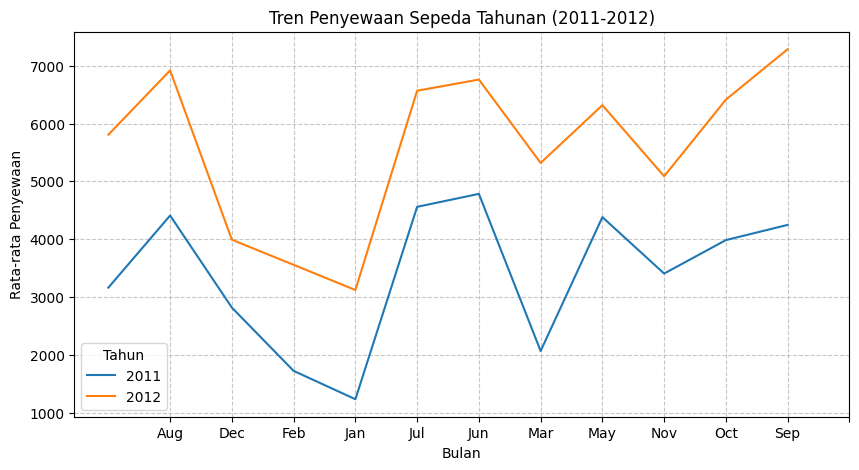

In [29]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=day_df, x='month', y='count', hue='year', estimator='mean', errorbar=None)
plt.title('Tren Penyewaan Sepeda Tahunan (2011-2012)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tahun')
plt.show()

## Conclusion

- Pertanyaan 1 : kondisi cuaca memiliki pengaruh signifikan terhadap permintaan penyewaan sepeda. Penyewaan tertinggi terjadi saat cuaca cerah atau berawan ringan (Clear/Partly Cloudy), menunjukkan bahwa pengguna lebih cenderung menyewa sepeda dalam kondisi yang mendukung. Sementara itu, penyewaan menurun pada cuaca berkabut atau berawan (Misty/Cloudy) dan mencapai titik terendah saat hujan ringan atau salju ringan (Light Snow/Rain), yang mengindikasikan bahwa kondisi cuaca buruk mengurangi minat masyarakat untuk menggunakan sepeda. Secara keseluruhan, semakin baik kondisi cuaca, semakin tinggi jumlah penyewaan sepeda.

- Pertanyaan 2 : jumlah penyewaan sepeda tertinggi terjadi pada pukul 17:00, kemungkinan karena banyak orang pulang kerja atau beraktivitas di sore hari. Sementara itu, jumlah penyewaan terendah terjadi pada pukul 3:00, saat sebagian besar orang sedang beristirahat atau tidur.

- Pertanyaan 3 : terlihat bahwa jumlah penyewaan sepeda pada tahun 2012 cenderung lebih tinggi dibandingkan tahun 2011 di hampir setiap bulan. Tren pada kedua tahun menunjukkan pola fluktuatif dengan peningkatan signifikan selama bulan-bulan tertentu, terutama pertengahan tahun. Penurunan penyewaan terlihat pada awal tahun dan akhir tahun, yang kemungkinan disebabkan oleh faktor musiman seperti cuaca dingin atau liburan. Hal ini menunjukkan adanya peningkatan minat terhadap penyewaan sepeda dari tahun ke tahun.

In [30]:
# clean data day to csv
day_df.to_csv('dashboard/day.csv', index=False)
hour_df.to_csv('dashboard/hour.csv', index=False)